### Chap2

In [1]:
library(ggplot2)
# set the path
setwd(getwd())

### Fig2-6[Histogram]

In [2]:
# load data
# 仅有一列数据，选取此列,从data.frame转化为vector
loans_income <- read.csv("../psds_data/loans_income.csv")[, 1]

In [3]:
# take a somple random sample
samp_data <- data.frame(income=sample(loans_income, 1000),
                       type = 'data_dist')

In [4]:
# take s sample of means of 5 values
sample_mean_05 <- data.frame(
    income = tapply(sample(loans_income, 1000*5), rep(1:1000, rep(5, 1000)),FUN=mean),
    type = 'mean_of_5'
)

# take s sample of means of 20 values
sample_mean_20 <- data.frame(
    income = tapply(sample(loans_income, 1000*20), rep(1:1000, rep(20, 1000)),FUN=mean),
    type = 'mean_of_20'
)

In [5]:
# bind the data.frames and convert type to a factor
income <- rbind(samp_data, sample_mean_05, sample_mean_20)
income$type <- factor(
    income$type, 
    levels = c('data_dist', 'mean_of_5', 'mean_of_20'),
    labels = c('Data', 'Mean of 5', 'Mean of 20')
)

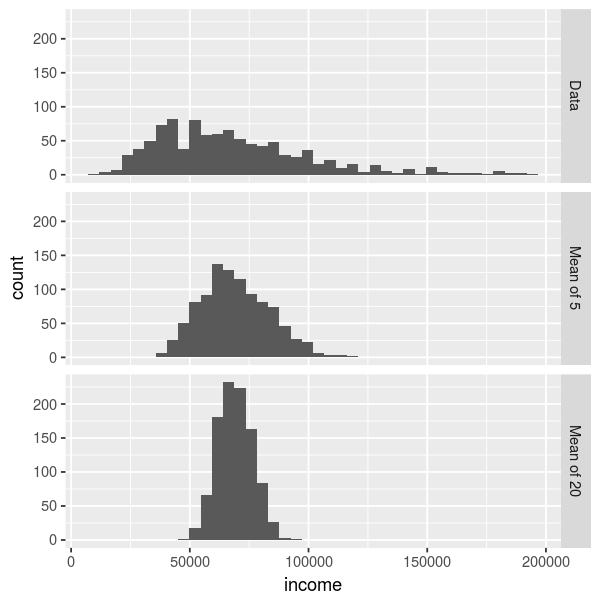

In [7]:
# plot the histogram
options(repr.plot.width=5, repr.plot.height=5)  # plot size
ggplot(income, aes(x=income))+
    geom_histogram(bins = 40)+
    facet_grid(type~.)

### Fig2-11[QQ-Plot]

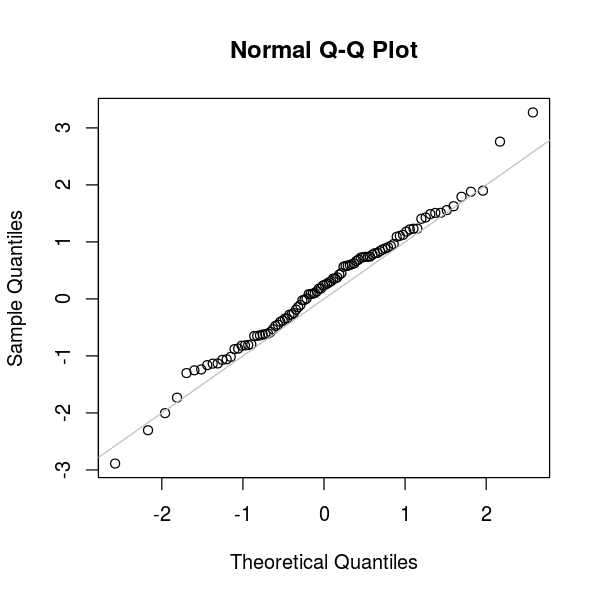

In [8]:
norm_samp <- rnorm(100)
qqnorm(norm_samp)
abline(a = 0, b = 1, col='gray')

### Fig2-12[QQ-Plot]

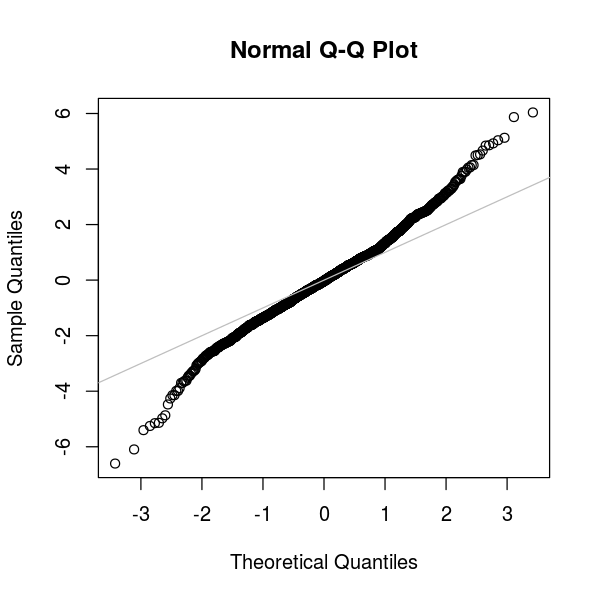

In [9]:
sp500_px <- read.csv("../psds_data/sp500_data.csv")
nflx <- sp500_px[, 'NFLX']
nflx <- diff(log(nflx[nflx>0]))
qqnorm(nflx)
abline(a=0, b=1, col='gray')